# 문제 1. 패션 MNIST 이미지 분류코드 작성

In [1]:
# Fashion MNIST 데이터셋은 넘파이 형식으로 구성되어 있음
import numpy as np

# 이미지 출력을 위한 라이브러리
import matplotlib.pyplot as plt

# 분석을 위한 tensorflow
import tensorflow as tf

In [2]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 1) 데이터를 탐색하여 데이터의 구조와 샘플 개수, 레이블 등을 파악하고 주석으로 설명하시오

- X_train(train_images)과 X_test(test_images)는 각각 28*28 형태를 갖는 60000개, 10000개의 Array,
y_train(train_labels)과 y_test(test_labels)는 각각 0부터 9까지의 정수값을 가지는 60000개, 10000개의 Array임을 확인할 수 있다.
- 이후에는 train_images, train_labels, test_images, test_labels로 사용한다.

In [3]:
# 데이터 구조 살펴보기

# train 데이터는 모델을 학습시킬때 사용
print('X_train 데이터 shape : ', train_images.shape)
print('y_train 데이터 shape : ', train_labels.shape)

# test 데이터는 모델의 성능을 테스트할 때 사용
print('X_test 데이터 shape : ', test_images.shape)
print('y_test 데이터 shape : ', test_labels.shape)

X_train 데이터 shape :  (60000, 28, 28)
y_train 데이터 shape :  (60000,)
X_test 데이터 shape :  (10000, 28, 28)
y_test 데이터 shape :  (10000,)


- 데이터의 레이블을 탐색하기 위해 y_train 값을 반환해보았다. 앞서 언급한 것과 같이 복수의 0부터 9까지의 정수 값으로 구성되어 있으며 이를 출력하기 위해 set 함수를 사용해주었다.

In [4]:
# 레이블 살펴보기
unique_labels = list(set(train_labels))
print('패션 MNIST 데이터셋 레이블 구성 : ', unique_labels)

패션 MNIST 데이터셋 레이블 구성 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


- 클래스 이름을 출력하기 위해 홈페이지에서 정수 0부터 정수 9까지에 해당하는 값들의 클래스 명을 가져왔으며, 이를 이후 아래의 코드에서 매칭시켜줄 예정이다.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2) 데이터를 전처리 한 후 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력하시오

- 첫번째 과제였던 MNIST 분류 문제와 동일하게 본 이미지는 0부터 255까지의 픽셀값으로 이루어져 있기 때문에, 이를 255로 나눠 0과 1 사이의 범위로 정규화한다.

In [6]:
# 모델은 단순한 정수를 처리하는것보다 0~1 사이의 실수를 처리할 때 더 좋은 성능을 보임. 따라서 이미지 데이터를 [0, 1] 범위로 정규화함
# 이미지는 0(흰색)~255(검은색)의 픽셀값으로 이루어져 있기 때문에 이미지에 255를 나눠줘 전처리를 진행함
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# 정규화 된 값들을 확인할 수 있다.
print(train_images[0])
print(test_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [8]:
# 레이블과 해당 클래스 이름을 매칭하는 딕셔너리를 생성했다.
label_to_class = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

labels = train_labels[:25]
fashion_name = [label_to_class[label] for label in labels]
fashion_name

['Ankle boot',
 'T-shirt/top',
 'T-shirt/top',
 'Dress',
 'T-shirt/top',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal',
 'T-shirt/top',
 'Ankle boot',
 'Sandal',
 'Sandal',
 'Sneaker',
 'Ankle boot',
 'Trouser',
 'T-shirt/top',
 'Shirt',
 'Coat',
 'Dress',
 'Trouser',
 'Coat',
 'Bag',
 'Coat']

- 0~9까지의 정수값으로 클래스명이 출력되는 것이 아니라, 실제 의류의 카테고리명이 출력이 될 수 있도록 앞서 매칭 작업을 진행해주었고, 25개의 사진에 해당하는 class_name이 도출되었다.

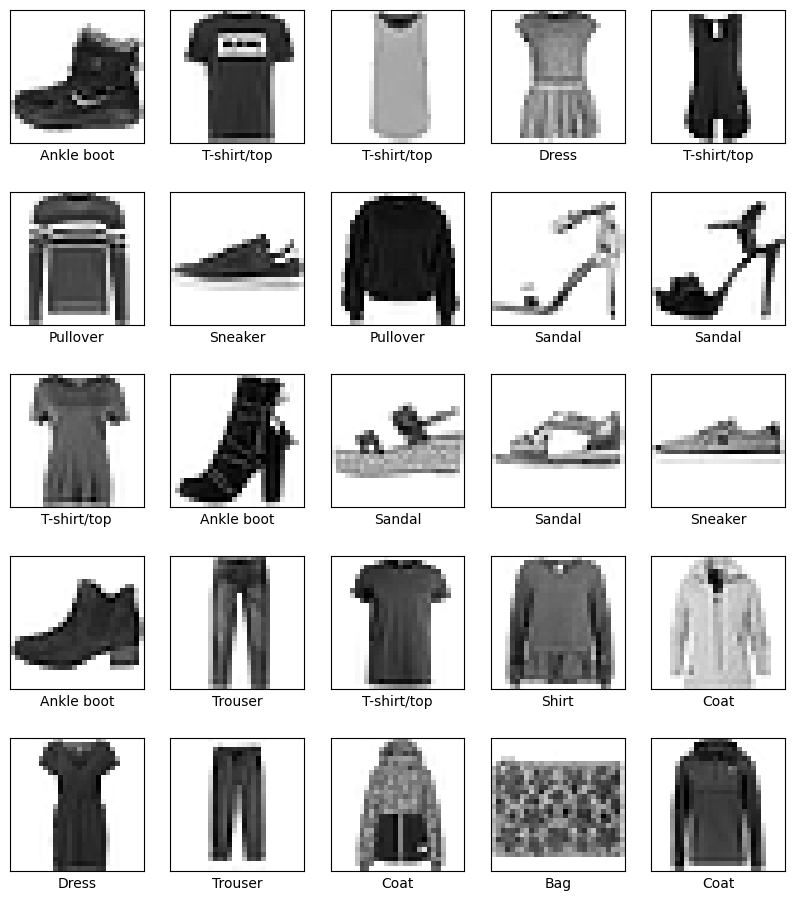

In [9]:
# X_train 세트에서 처음 25개 이미지와 클래스 이름(각 이미지의 레이블)을 출력함
plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=0)  # 하단 여백 조정
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])  # x축 눈금 제거
    plt.yticks([])  # y축 눈금 제거
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # 이미지 출력
    plt.xlabel(fashion_name[i]) # 클래스 이름 출력(실제 의류명으로 변환하여 출력하기)

plt.show()

# 3) 예시 코드를 따라 모델을 구성하고, 각 과정에 대해 주석으로 설명하시오

- 뉴런 노드의 개수를 조정할 경우 정확도와 손실 값이 어떤 추이를 보이는지 확인하고자 각각 128, 256, 512 여러 경우로 나눠 모델을 설정해주었습니다.
- 뉴런의 개수는 보통 2의 거듭제곱을 사용합니다.

In [10]:
# 뉴런 노드의 개수를 각각 설정합니다.
cases = [128, 256, 512]

# 각 케이스의 정확도를 저장할 리스트를 생성합니다.
accuracies = []

# for문을 이용하여 뉴런 노드의 개수를 바꿔가며 모델을 선언합니다.
for i, neurons in enumerate(cases) :
  print(f"Case {i + 1} : 뉴런 노드의 개수 = {neurons}개")
  # 모델을 선언합니다.
  model = tf.keras.Sequential([
      # Flatten은 입력 데이터를 1차원으로 평탄화하며 입력 데이터를 변경하지 않고 1D 벡터로 변경해주는 클래스
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      # Relu 활성화 함수는 기본적으로 은닉층에서 사용됩니다.
      tf.keras.layers.Dense(neurons, activation='relu'),
      # 우리의 최종적인 목표는 레이블을 0부터 9까지의 정수값으로 분류하는 것으로 따라서 Dense 값은 10으로 설정합니다.(= 출력 뉴런이 10개)
      tf.keras.layers.Dense(10)
  ])
  # 모델을 기계가 이해할 수 있도록 컴파일 합니다. 손실 함수와 옵티마이저, 메트릭 함수를 선택합니다.
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  # 모델을 요약합니다.
  model.summary()

  # 모델을 학습합니다.
  history = model.fit(train_images, train_labels, epochs=10)

  # 학습된 모델의 정확도를 평가합니다.
  test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
  print('손실률 : ', round(test_loss, 4), '정확도 :', round(test_acc, 4))

  # 정확도 값을 리스트에 저장합니다.(각 epoch별로 저장)
  accuracies.append(history.history['accuracy'])

  # 훈련된 모델을 사용하여 처음 15개의 샘플에 대한 예측을 진행합니다.
  probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
  predictions = probability_model.predict(test_images)
  for i in range(15):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = test_labels[i]
    print(f"Sample {i + 1}: 예측값 = {predicted_label}, 실제값 = {true_label}")

  print("-----" * 10)

Case 1 : 뉴런 노드의 개수 = 128개
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 17s 7ms/step - loss: 0.5010 - accuracy: 0.8226
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3722 - accuracy: 0.8650
Epoch 3/10
1875/1875 [===========================

# 4) epochs를 10으로 설정하여 모델을 훈련하고, 정확도에 대해 주석으로 평가하시오

- 뉴런 노드의 개수가 128개인 경우
  - 정확도 = 0.9118
- 뉴런 노드의 개수가 256개인 경우
  - 정확도 = 0.9152
- 뉴런 노드의 개수가 512개인 경우
  - 정확도 = 0.9177

뉴런 노드의 개수를 늘렸음에도 불구하고 정확도의 뚜렷한 증가폭이 드러나지 않은 것은 패션 MNIST 분류 문제가 상대적으로 간단한 문제이기 때문이다.

뉴런 노드의 개수를 늘릴 경우 학습에 걸리는 시간이 증가하게 되기에, 적절한 뉴런 노드의 개수를 선정하여 효율적으로 선택해 짧은 학습 시간 동안 높은 정확도를 추구해야만 한다.

# 5) 훈련된 모델을 사용하여 테스트셋을 예측하고 성능을 주석으로 설명하시오

- 뉴런 노드의 개수가 128개인 경우
  - 정확도 = 0.8862
- 뉴런 노드의 개수가 256개인 경우
  - 정확도 = 0.8847
- 뉴런 노드의 개수가 512개인 경우
  - 정확도 = 0.8827

각각의 뉴런 노드의 개수로 훈련된 모델으로 테스트셋을 예측해보았으나, 개수의 증가에 따라 성능이 높아지는 모습이 나타나지 않았다. 이 역시 모델의 성능을 높이기 위해서는, 적절한 뉴런 노드의 개수 선정이 필수적이다는 것의 방증이다.

# 6) 처음 15개 샘플의 예측을 확인하고 결과를 주석으로 설명하시오

| Sample | Case 1 | Case 2 | Case 3 |
|:----:|:----:|:----:|:----:|
| 1 | 예측값 = 9, 실제값 = 9 | 예측값 = 9, 실제값 = 9 | 예측값 = 9, 실제값 = 9 |
| 2 | 예측값 = 2, 실제값 = 2 | 예측값 = 2, 실제값 = 2 | 예측값 = 2, 실제값 = 2 |
| 3 | 예측값 = 1, 실제값 = 1 | 예측값 = 1, 실제값 = 1 | 예측값 = 1, 실제값 = 1 |
| 4 | 예측값 = 1, 실제값 = 1 | 예측값 = 1, 실제값 = 1 | 예측값 = 1, 실제값 = 1 |
| 5 | 예측값 = 6, 실제값 = 6 | 예측값 = 6, 실제값 = 6 | 예측값 = 6, 실제값 = 6 |
| 6 | 예측값 = 1, 실제값 = 1 | 예측값 = 1, 실제값 = 1 | 예측값 = 1, 실제값 = 1 |
| 7 | 예측값 = 4, 실제값 = 4 | 예측값 = 4, 실제값 = 4 | 예측값 = 4, 실제값 = 4 |
| 8 | 예측값 = 6, 실제값 = 6 | 예측값 = 6, 실제값 = 6 | 예측값 = 6, 실제값 = 6 |
| 9 | 예측값 = 5, 실제값 = 5 | 예측값 = 5, 실제값 = 5 | 예측값 = 5, 실제값 = 5 |
| 10 | 예측값 = 7, 실제값 = 7 | 예측값 = 7, 실제값 = 7 | 예측값 = 7, 실제값 = 7 |
| 11 | 예측값 = 4, 실제값 = 4 | 예측값 = 4, 실제값 = 4 | 예측값 = 4, 실제값 = 4 |
| 12 | 예측값 = 5, 실제값 = 5 | 예측값 = 5, 실제값 = 5 | 예측값 = 5, 실제값 = 5 |
| 13 | 예측값 = 7, 실제값 = 7 | 예측값 = 5, 실제값 = 7 | 예측값 = 8, 실제값 = 7 |
| 14 | 예측값 = 3, 실제값 = 3 | 예측값 = 3, 실제값 = 3 | 예측값 = 3, 실제값 = 3 |
| 15 | 예측값 = 4, 실제값 = 4 | 예측값 = 4, 실제값 = 4 | 예측값 = 4, 실제값 = 4 |

- 추가적으로 Case별로 epoch에 따른 정확도의 증가 추이를 확인하기 위해 아래의 차트를 제작하였다.
  - 뉴런 노드의 개수가 가장 많고 실제로도 정확도가 가장 높다고 출력된 Case 3의 정확도가 전반적으로 가장 높은 것으로 나타났다.

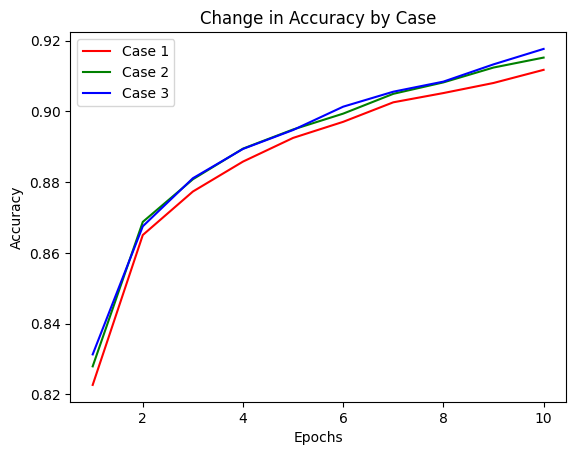

In [11]:
# 색깔 지정
colors = ['r', 'g', 'b']

# 정확도 그래프 그리기
epochs = range(1, len(accuracies[0]) + 1)
for i, acc in enumerate(accuracies):
    plt.plot(epochs, acc, label=f'Case {i + 1}', color=colors[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy by Case')
plt.legend()
plt.show()

- 모델을 활용하여 예측을 확인하고자 이미지에 대한 예측을 수행했다.

In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

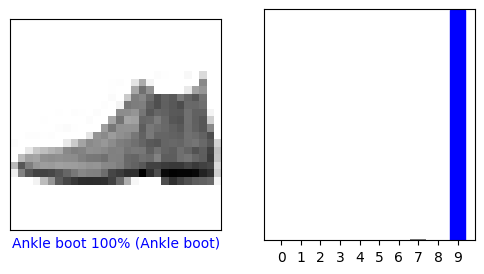

In [13]:
# 첫 번째(0번째) 이미지에 대한 예측이다. 신뢰도 점수도 도출되었다.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

6번 문제에서 요구한 첫 15개 샘플의 예측에 대한 구체적인 신뢰도 값이다.

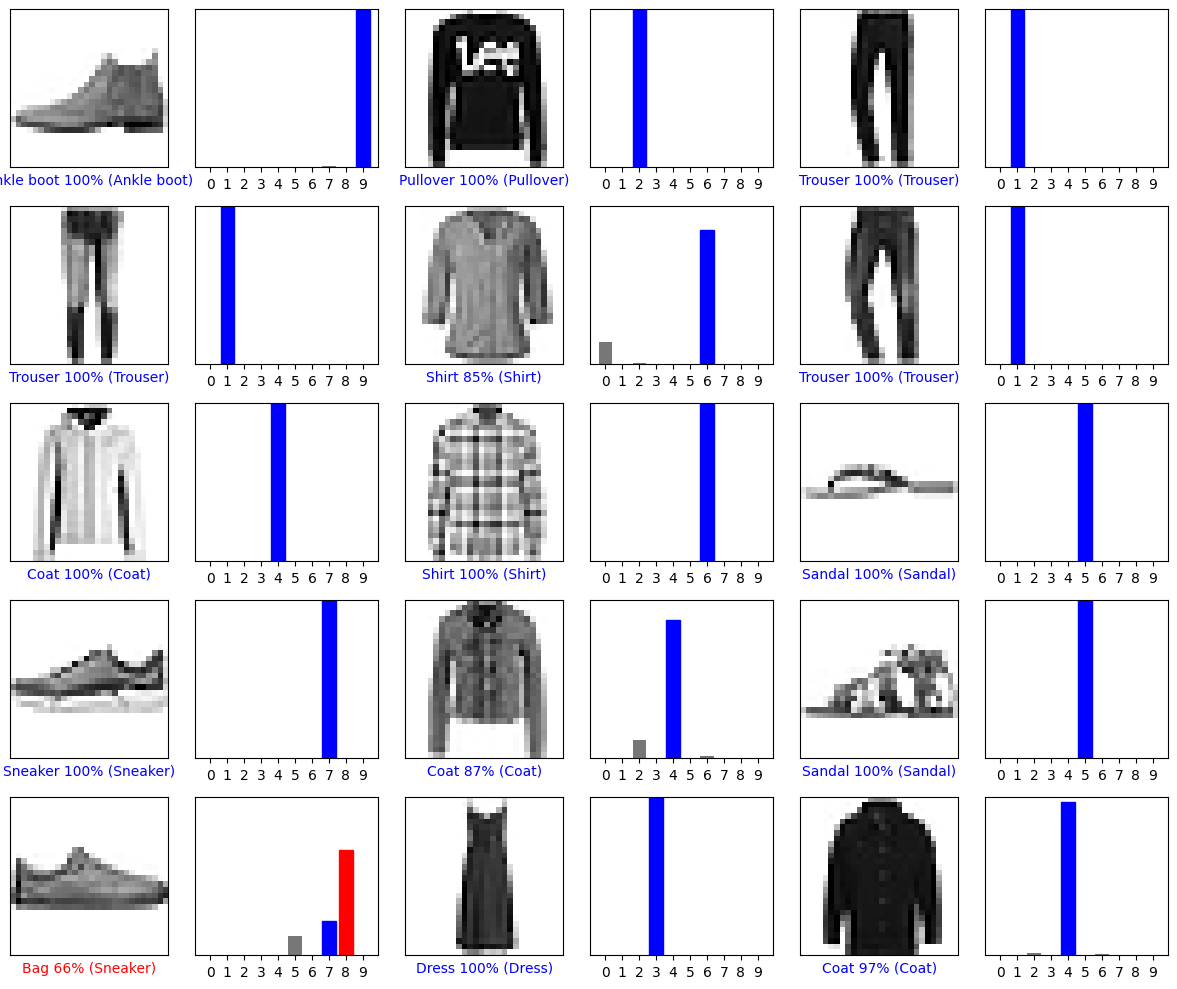

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 문제 2. 자동차 연비(Auto MPG) 예측 코드 작성

In [ ]:
# 산점도 행렬을 그리기 위해 seaborn 패키지를 설치합니다.
!pip install -q seaborn

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

# 1) 데이터를 읽고 첫 5개 행을 dataframe으로 출력하시오

- head 함수를 통해 첫 5개 행을 출력했으며 dataset의 type이 데이터프레임임을 확인함

In [ ]:
dataset = raw_dataset.copy()
# head를 통해 첫 5개 행을 데이터프레임으로 출력합니다.
print('데이터셋의 형태 : ', type(dataset))
dataset.head()

데이터셋의 형태 :  <class 'pandas.core.frame.DataFrame'>


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# 2) 데이터를 정제한 후 훈련 세트와 테스트 세트로 분할하고 주석으로 설명하시오

## 데이터 전처리

In [ ]:
# 마력(Horsepower)에 결측치가 6개 존재함
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# 해당 결측치 삭제
dataset = dataset.dropna()

In [ ]:
# origin은 수치형이 아니고 범주형이기 때문에 현재의 정수형을 변형시킴
# 원 핫 인코딩 진행
origin = dataset.pop('Origin') #  데이터프레임에서 'Origin' 열을 제거하고 해당 열의 데이터를 반환
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
# 정제된 데이터셋의 정보를 확인한다.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   USA           392 non-null    float64
 8   Europe        392 non-null    float64
 9   Japan         392 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 33.7 KB


## 모델링 위한 데이터 분할

In [ ]:
# 정제된 데이터를 훈련 데이터와 테스트 데이터로 분할한다.(8대2의 비율로 분할함)
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# 3) 데이터를 탐색하여 전반적인 통계를 주석으로 설명하시오.

변수별 기초통계량을 통해 전반적인 통계를 살펴본다.
- 먼저 독립변수들의 단위가 모두 다른 것을 확인할 수 있고, 이에 따라 정규화 과정이 필요함을 알 수 있다.
- 실린더(Cylinders)의 경우 대부분의 차량이 4기통 혹은 8기통임을 확인할 수 있다.
- 자동차의 배기량(Displacement)은 평균값이 195인데 중앙값은 151이다. 배기량 값들의 분포는 전반적으로 왼쪽으로 긴 꼬리를 가진 분포를 띄는 것으로 보이며, 일부 자동차의 배기량이 매우 큰 값을 가지는 것으로 보인다.
- 마력(Horsepower)은 평균값이 104, 표준 편차가 38이다.
- 무게(Weight)는 평균값이 2990이다. 가장 큰 값이 5140인데, 높은 배기량을 가진 차량일 것이다.
- Acceleration은 평균값과 중앙값이 15로 일치한다.
- 제작년도(Model Year)를 살펴보면, 본 데이터의 차량들은 1970~1980년대 초반의 차량들에 대한 데이터인 것으로 확인된다.
- Origin의 경우 범주형 변수여서 기초통계량에서 보는 것이 큰 의미가 없다.(따라서 아래의 코드에서 따로 분포를 확인한다.)

In [ ]:
# 변수별 기초통계량 확인
train_stats = train_dataset.describe()
train_stats.pop('MPG')

# 처음에는 반대로 봤는데 불편해서 행렬을 바꿔주었다. 그리고 이후에 정규화할 때도 열 단위로 통계량이 있어야 값을 활용하기 편하다.
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Model year(제작년도)의 분포를 확인하였다.
train_dataset['Model Year'].value_counts()

73    30
77    28
78    26
70    26
76    25
79    24
72    24
82    24
75    24
80    23
74    22
71    20
81    18
Name: Model Year, dtype: int64

- Origin 변수의 경우 미국 196대, 일본 62대, Europe 56대다.

In [ ]:
# 원 핫 인코딩을 통해 범주형 변수로 변형된 Origin의 경우, value_counts()를 통해 각국에 몇 개의 데이터가 있는지 행수를 세어준다.
train_dataset[["USA", "Europe", "Japan"]].value_counts()

USA  Europe  Japan
1.0  0.0     0.0      196
0.0  0.0     1.0       62
     1.0     0.0       56
dtype: int64

MPG(Miles Per Gallon)으로 높을수록 연비가 높다는 뜻이다.
- 실린더의 경우 많을수록 연비가 낮아진다.
- 시각화된 차트들에 따르면 연비에 미치는 영향이 배기량(Displacement)와 무게(Weight)는 굉장히 유사할 것으로 보인다. 즉, 배기량과 무게는 적을수록 연비가 좋다.

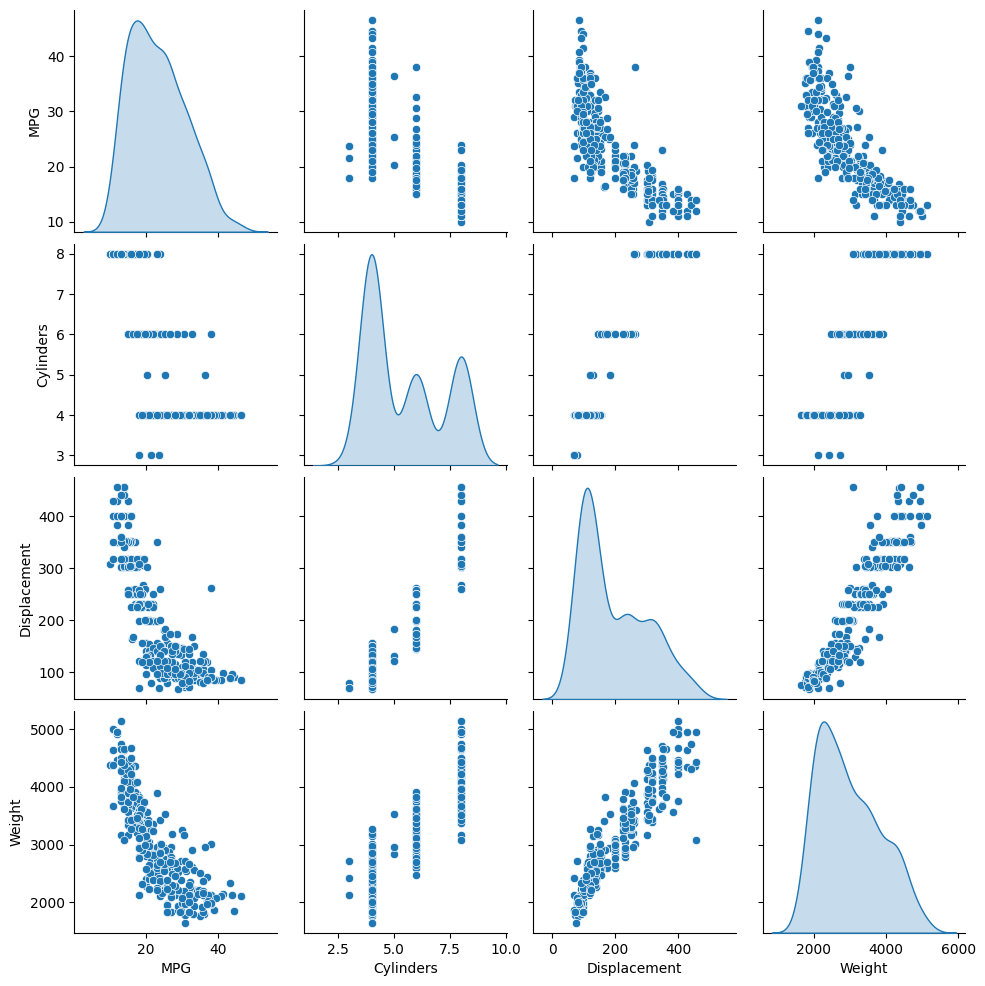

In [ ]:
# 아래의 차트는 4개의 변수들의 관계를 시각화한 것이다.
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

# 4) 특성과 레이블을 분리하고 정규화 한 후 주석으로 설명하시오

특성(feature)과 레이블(labels)를 분리
- 레이블에는 MPG, 특성에는 MPG를 제외한 모든 변수들이 할당된다.
- train_dataset, test_dataset에서 MPG 변수만 빠지는 개념.

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

- 정규화 작업
  - 아래의 도표에서도 볼 수 있듯이, 각각의 변수들의 단위가 천차만별이기 때문에 이럴 경우 정규화를 진행한다.

In [ ]:
train_features.describe().transpose()[['mean', 'std']]

,mean,std
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
USA,0.624204,0.485101
Europe,0.178344,0.383413
Japan,0.197452,0.398712


In [ ]:
# 함수를 통해 정규화를 진행한다. 이를 통해 특성(Feature)에 해당되는 값들이 정규화되었다.
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# 5) 두 개의 완전 연결층으로 구성된 모델을 만들고 모델의 간단한 정보를 출력한 후 주석으로 설명하시오

- 두 개의 Fully connected layer로 구성된 모델을 만든다.
- 수업시간에 여러가지 Optimizer를 통한 최적화를 배웠는데, 앞선 Fashion Mnist에서는 뉴런 노드의 개수에 따른 성능의 변화를 살펴보았다면, 이번에는 Optimizer에 따른 성능 변화를 확인한다.
- 첫번째 사례에서는 RMSprop을 사용하고, 두번째 사례에서는 Adam을 사용한다.

In [ ]:
def build_model():
  model = keras.Sequential([
    # input_shape는 입력변수의 수
    # Dense는 완전 연결층을 생성한다.
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]), # hidden layer 1
    layers.Dense(64, activation='relu'), # hidden layer 2
    layers.Dense(1) # 출력변수는 하나의 연속된 값이다.
  ])
  # RMSProp은 최근 경로의 곡면 변화량에 따라 학습률을 적응적으로 결정하는 알고리즘이다.
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

- 모델의 간단한 정보를 출력하는데 summary가 사용된다.
  - 두 개의 은닉층, 하나의 출력층 총 3개의 레이러로 구성되어 있는 인공 신경망이다.
    - 첫 번째 레이어의 출력 형태는 (None, 64)이고, 이 레이어에는 640개의 파라미터가 있다.
    - 두 번째 레이어의 출력 형태는 (None, 64)이고, 이 레이어에는 4160개의 파라미터가 있다.
    - 세 번째 레이어의 출력 형태는 (None, 1)이고, 이 레이어에는 65개의 파라미터가 있다.

이 인공 신경망은 여러 입력 변수들을 통해 데이터를 받고, 마지막 레이어에서는 하나의 값을 출력하도록 구성되어 있다.

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 먼저 정규화된 선행 데이터 10개를 가져와 batch로 구성하여 모델을 예측하는데 사용한다.
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 52ms/step


array([[0.48894924],
       [0.23097135],
       [0.42232978],
       [0.31631792],
       [0.39984453],
       [0.19018017],
       [0.4530147 ],
       [0.4887176 ],
       [0.18142961],
       [0.6728071 ]], dtype=float32)

# 6) 1000번의 epochs로 훈련하고 훈련에 따른 성능 변화를 시각화 한 후 주석으로 설명하시오

In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    # 에포크 백번째마다 새로운 줄에서 점을 찍는다.
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  # 훈련 데이터의 20%를 검증용으로 사용한다.
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

998번째 epoch에서 살짝 값이 증가됐다 다시 줄어들기는 했지만 전반적으로 epoch를 거듭할수록 loss가 줄어들고 있으며 mae와 mse 역시 줄어들 것이다. 그러나 validation 값이 전반적으로 더 높은 것으로 보아 모델의 과적합 가능성이 있으며, 이럴 경우 더 많은 학습을 하는 것이 옳은 방향은 아니다.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.179104,0.908568,2.179104,9.848742,2.461008,9.848742,995
996,2.115978,0.966628,2.115978,9.740135,2.408228,9.740135,996
997,2.169000,0.922617,2.169000,9.702439,2.392823,9.702439,997
998,2.486214,1.027324,2.486214,9.148792,2.306231,9.148792,998
999,2.166519,0.940594,2.166519,9.045342,2.282820,9.045342,999


100 이상의 epoch부터는 MAE, MSE 값이 잘 낮아지지도 않을 뿐더러, 오히려 교차 검증 오차만 증가하여 모델이 과적합하는 현상이 나타나고 있다. 따라서 본 모델은 많은 epoch를 통한 훈련을 필요로 하지 않는다.

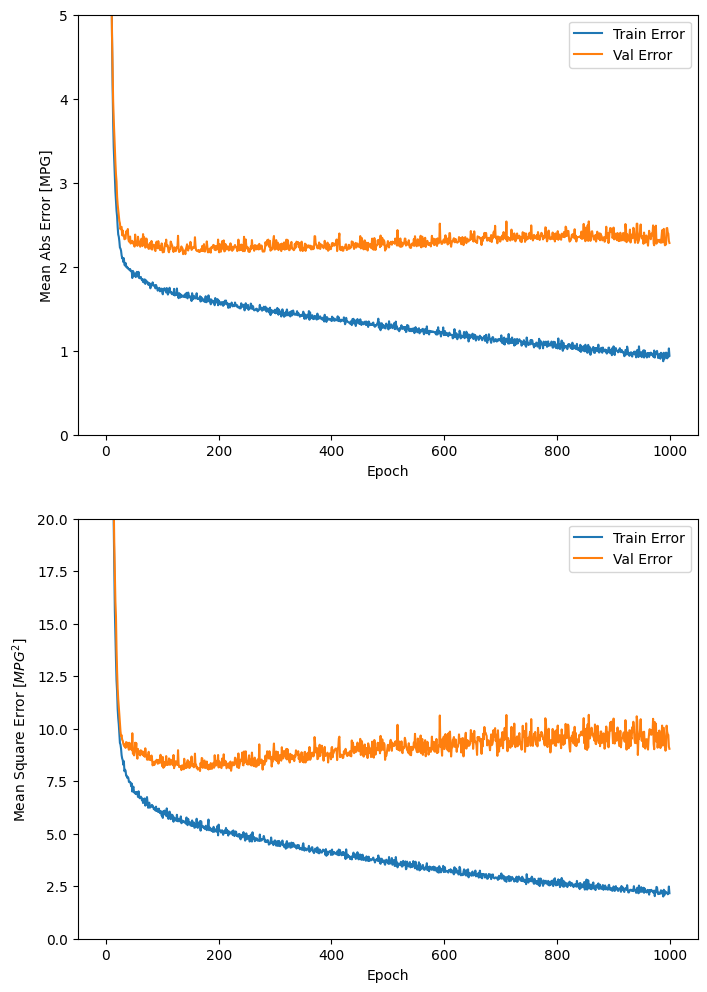

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

따라서 callback 중 하나인 Earlystopping을 통해 val_loss가 10 epoch 동안 향상되지 않으면 훈련이 조기 종료되도록 설정했으며, 이에 따라 epoch가 60대에 훈련이 중단된 것을 확인할 수 있다.


............................................................

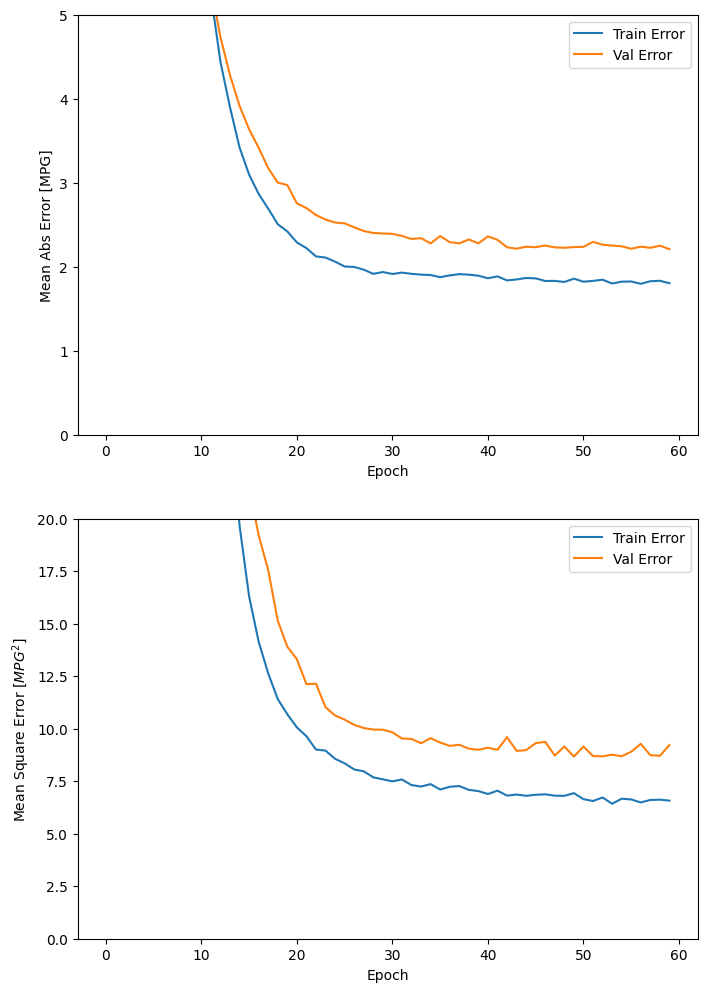

In [ ]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

훈련된 모델을 test_dataset에 적용하여 MAE를 계산한 결과, 2.01 MPG가 출력되었다.
- 본 모델을 통해 앞서 사용한 입력변수들을 이용하여 연비를 계산할 경우 +-2.01 정도의 평균 절대 오차가 발생한다는 것이다.

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.2406 - mae: 2.0149 - mse: 6.2406 - 104ms/epoch - 35ms/step
테스트 세트의 평균 절대 오차:  2.01 MPG


# 7) 테스트셋으로 자동차 연비를 예측하고 주석으로 설명하시오

모델의 결과가 test_dataset에 있는 sample들을 잘 예측했음을 확인할 수 있다.
예측이 실제값과 거의 같다는 것을 의미하며, 성능은 좋으나 과적합의 우려가 있는 모델이다.

3/3 [==============================] - 0s 3ms/step


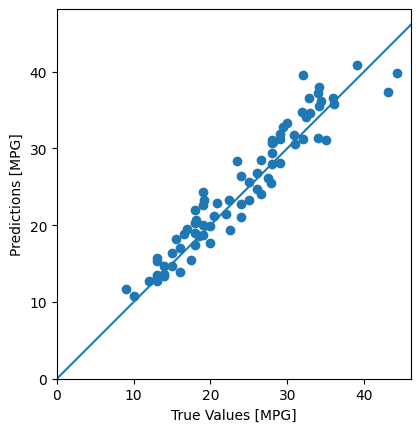

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Optimizer가 ADAM일 경우

- Adam은 SGD 모멘텀과 RMSProp을 합쳐 학습 초기 경로가 편향되는 RMSProp의 문제를 제거함
- 관성에 대한 장점과 적응적 학습률에 대한 장점을 모두 가짐

앞선 과정들과 동일하게 진행하였다.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]), # hidden layer 1
    layers.Dense(64, activation='relu'), # hidden layer 2
    layers.Dense(1) # 출력변수는 하나의 연속된 값이다.
  ])
  # Adam은 진행하던 속도에 관성을 주고 동시에 최근 경로의 곡면의 변화량에 따라 적응적 학습률을 갖는 알고리즘
  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

모델의 구성은 기존의 모델과 같다. 따라서 파라미터수가 변화하거나 레이어의 개수가 변화하지 않는다.

In [ ]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 144ms/step


array([[ 0.4145142 ],
       [ 0.10242715],
       [ 0.28679168],
       [ 0.249409  ],
       [ 1.1996458 ],
       [-0.0168262 ],
       [ 1.2058853 ],
       [ 0.48962712],
       [ 0.10826091],
       [ 1.088489  ]], dtype=float32)

이전 모델과 마찬가지로 1000번의 epoch를 가지며, 교차검증을 위한 데이터를 20% 훈련 데이터셋에서 할당한다.

In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

사실상 RMSProp과의 값의 큰 차이가 보이지 않아 이후 시각화된 차트를 통해 확인한다.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.983724,1.095637,2.983724,10.078270,2.466153,10.078270,995
996,2.613869,1.062724,2.613869,9.838111,2.405148,9.838111,996
997,2.797088,1.043751,2.797088,9.770733,2.458281,9.770733,997
998,2.718892,1.082063,2.718892,10.097569,2.428566,10.097569,998
999,2.553282,1.029773,2.553282,10.034325,2.466915,10.034325,999


먼저 차트상에서 MAE 혹은 MSE 값의 증감폭이 epoch를 진행할때마다 RMSProp의 경우 다소 튀는 경향을 보이지만, Adam의 경우 상대적으로 정도가 덜하다. 이는 곧 Adam Optimizer가 Momentum을 이용하여 보다 효율적으로 그라디언트 업데이트를 진행하기 때문이다.
또한 앞선 차트와 마찬가지로 epoch가 이른 시점부터 값의 변화를 만들어내지 못하고 오히려 모델의 과적합을 유도하기 때문에 빠른 시점의 학습 종료가 필요하며, 이에 따라 위의 모델과 동일하게 조기 종료가 필요하다.

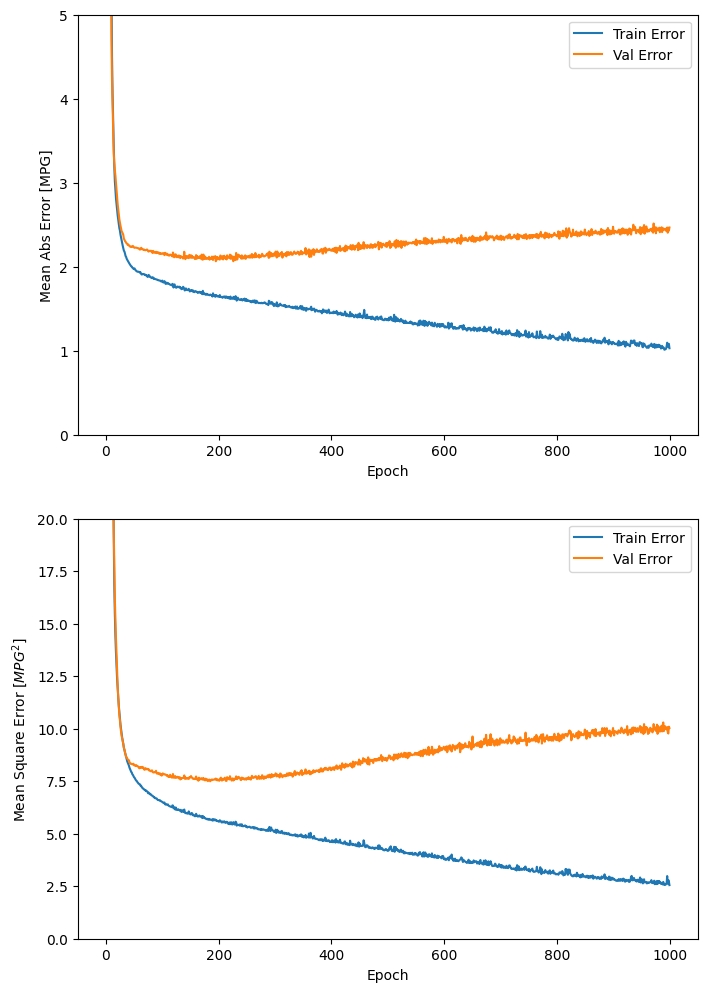

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

마찬가지로 val_loss가 epoch 10회까지 성능의 개선을 이끌어내지 못한다면 모델의 학습이 조기 종료될 수 있도록 설정하였고, RMSProp optimizer가 Epoch가 60회에서 종료된 반면 adam optimizer의 경우 epoch가 140회 안팎에서 종료되었다.


....................................................................................................
....................................................

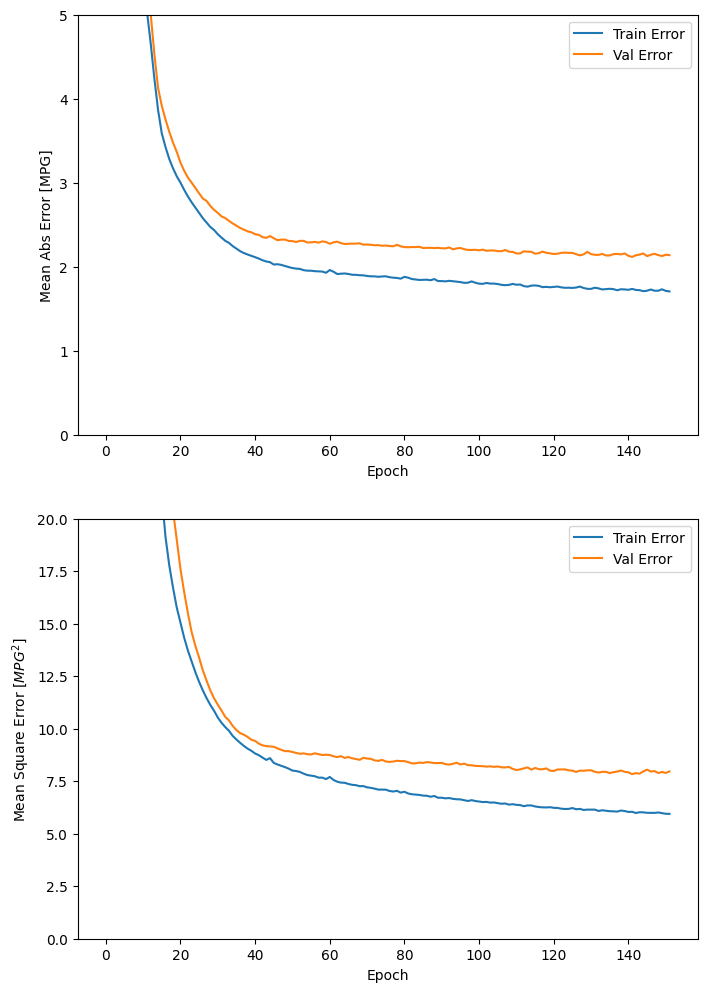

In [ ]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

Adam Optimizer를 사용한 모델이 RMSProp을 사용한 모델보다 테스트 데이터셋에 적용하였을 때 MAE 값이 1.76으로 2.01보다 더 작았다.

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.2322 - mae: 1.7582 - mse: 5.2322 - 28ms/epoch - 9ms/step
테스트 세트의 평균 절대 오차:  1.76 MPG


앞선 차트와 마찬가지로 값들이 직선 근처에 잘 분포하고 있는 것으로 보아, 모델의 성능이 좋을 것으로 보이나 마찬가지로 과적합의 가능성이 존재하는 모델이다.

3/3 [==============================] - 0s 3ms/step


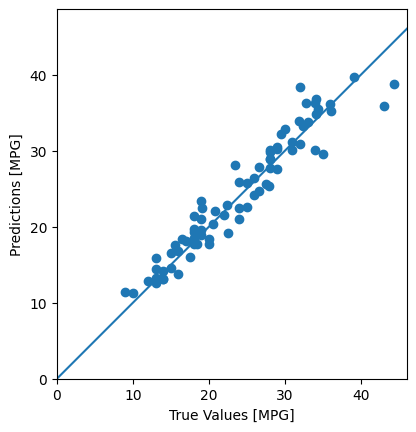

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])